In [1]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal

In [2]:
#data=pd.read_csv('PartAdata.csv')
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('PartAdata.csv')
data_cluster = pd.read_csv('nba_2017_players_stats_combined.csv')
print(data.shape)
data.head()

(18964, 51)


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [4]:
#data cleaning
data.GS.fillna(data.GS.mean(),inplace=True) 
data.PTS.fillna(data.PTS.mean(),inplace=True) 
data.PER.fillna(data.PER.mean(),inplace=True) 
data['FT%'].fillna(data['FT%'].mean(),inplace=True) 
data['2P%'].fillna(data['2P%'].mean(),inplace=True) 
data['3P%'].fillna(data['3P%'].mean(),inplace=True) 
data['TS%'].fillna(data['TS%'].mean(),inplace=True) 
data['PER']=data['PER'].replace([129.100000], np.nan)
data['PER']=data['PER'].replace([-90.600000], np.nan)
data.PER.fillna(data.PER.mean(),inplace=True) 
data['FT%'].fillna(data['FT%'].mean(),inplace=True) 
data['2P%'].fillna(data['2P%'].mean(),inplace=True) 
data['3P%'].fillna(data['3P%'].mean(),inplace=True) 
data['TS%']=data['TS%'].replace(data['TS%'][data['TS%']>1], data['TS%'][data['TS%']].mean())

            Unnamed: 0      Year       Age         G        GS        MP  \
Unnamed: 0    1.000000  0.997013  0.012594 -0.099754 -0.045313 -0.078217   
Year          0.997013  1.000000  0.020290 -0.102183 -0.045099 -0.079250   
Age           0.012594  0.020290  1.000000  0.017809  0.038328  0.036514   
G            -0.099754 -0.102183  0.017809  1.000000  0.625899  0.862103   
GS           -0.045313 -0.045099  0.038328  0.625899  1.000000  0.857297   
MP           -0.078217 -0.079250  0.036514  0.862103  0.857297  1.000000   
PER           0.001879  0.001149 -0.005637  0.416450  0.433649  0.510954   
TS%           0.016460  0.013098  0.029861  0.380112  0.290703  0.377151   
3PAr          0.412911  0.414646  0.072755 -0.021688 -0.053690 -0.002922   
FTr          -0.087539 -0.084863 -0.063599 -0.049441 -0.005194 -0.025737   
ORB%         -0.107571 -0.105384 -0.075995 -0.036893 -0.028155 -0.074469   
DRB%          0.095090  0.094332  0.020206  0.054535  0.105493  0.059645   
TRB%        

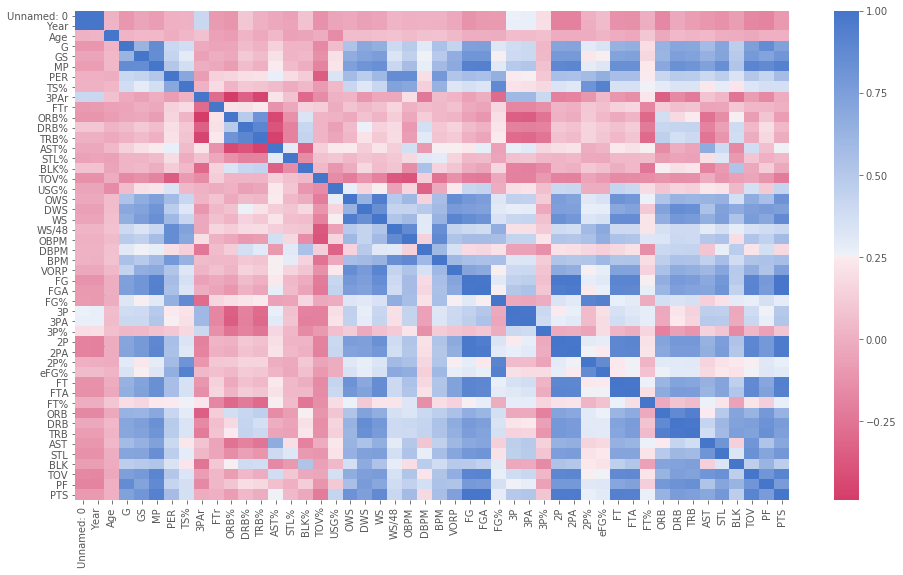

In [5]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = data.corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

In [6]:
range(1,2+1)
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
dist.rvs()
a=np.append(np.array(1),dist.rvs())
a
print (random.random())

0.6435870660638338


In [7]:
data.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,23.593375,3143.0,25.3,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,23.593375,1222.0,11.0,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,23.593375,2168.0,19.2,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.000000,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,23.593375,560.0,7.4,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [8]:
data=data.drop(['Player','Tm','Pos'],axis=1)
data.head()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,5727,1980.0,32.0,82.0,23.593375,3143.0,25.3,0.639,0.001,0.344,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,5728,1980.0,25.0,67.0,23.593375,1222.0,11.0,0.511,0.003,0.258,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,5729,1980.0,25.0,75.0,23.593375,2168.0,19.2,0.571,0.002,0.270,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,5730,1980.0,31.0,80.0,80.000000,2864.0,15.3,0.574,0.023,0.548,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,5731,1980.0,31.0,26.0,23.593375,560.0,7.4,0.524,0.000,0.833,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [9]:
data.isnull().sum()

Unnamed: 0      0
Year           37
Age            37
G              37
GS              0
MP             37
PER             0
TS%             0
3PAr          125
FTr           125
ORB%           42
DRB%           42
TRB%           42
AST%           42
STL%           42
BLK%           42
TOV%           98
USG%           42
OWS            37
DWS            37
WS             37
WS/48          42
OBPM           37
DBPM           37
BPM            37
VORP           37
FG             37
FGA            37
FG%           125
3P             37
3PA            37
3P%             0
2P             37
2PA            37
2P%             0
eFG%          125
FT             37
FTA            37
FT%             0
ORB            37
DRB            37
TRB            37
AST            37
STL            37
BLK            37
TOV            37
PF             37
PTS             0
dtype: int64

In [10]:
data.fillna(data.mean(),inplace=True) 

In [11]:
data.isnull().sum()

Unnamed: 0    0
Year          0
Age           0
G             0
GS            0
MP            0
PER           0
TS%           0
3PAr          0
FTr           0
ORB%          0
DRB%          0
TRB%          0
AST%          0
STL%          0
BLK%          0
TOV%          0
USG%          0
OWS           0
DWS           0
WS            0
WS/48         0
OBPM          0
DBPM          0
BPM           0
VORP          0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
dtype: int64

In [12]:
def num_to_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

In [13]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

Counter({4: 6939, 0: 6648, 1: 4001, 2: 1137, 3: 239})


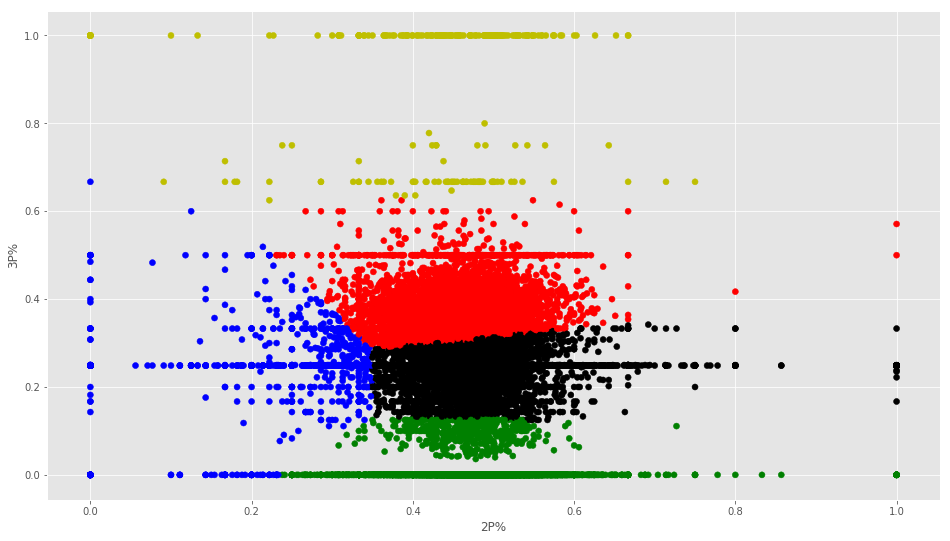

In [14]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=5)
X = data[["2P%", "3P%"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(data["2P%"], data["3P%"], c=colors)
plt.xlabel("2P%")
plt.ylabel("3P%")
plt.show()

Counter({2: 10552, 0: 4227, 1: 3580, 3: 605})


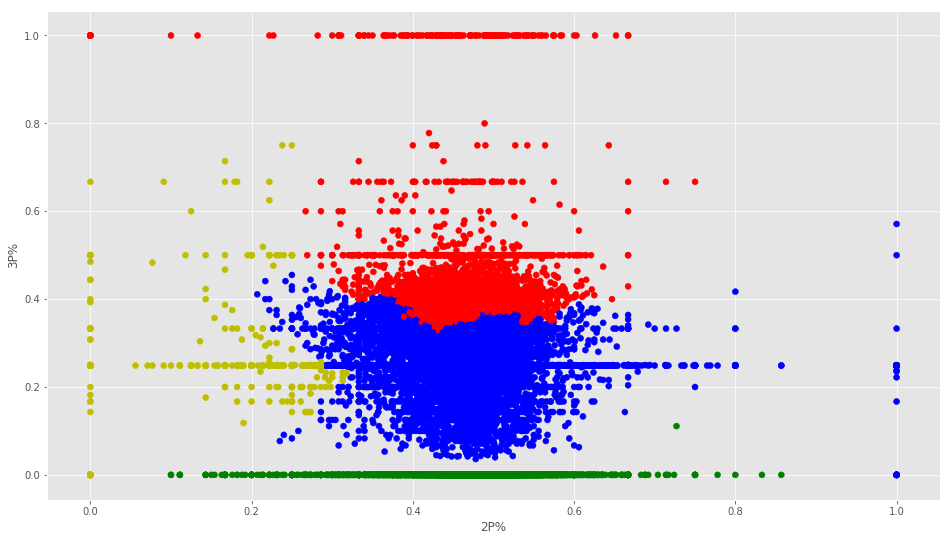

In [16]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = data[["2P%", "3P%"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(data["2P%"], data["3P%"], c=colors)
plt.xlabel("2P%")
plt.ylabel("3P%")
plt.show()

In [17]:
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 38 columns):
Unnamed: 0    446 non-null int64
Rk            446 non-null int64
PLAYER        446 non-null object
POSITION      446 non-null object
AGE           446 non-null int64
MP            446 non-null float64
FG            446 non-null float64
FGA           446 non-null float64
FG%           446 non-null float64
3P            446 non-null float64
3PA           446 non-null float64
3P%           415 non-null float64
2P            446 non-null float64
2PA           446 non-null float64
2P%           446 non-null float64
eFG%          446 non-null float64
FT            446 non-null float64
FTA           446 non-null float64
FT%           438 non-null float64
ORB           446 non-null float64
DRB           446 non-null float64
TRB           446 non-null float64
AST           446 non-null float64
STL           446 non-null float64
BLK           446 non-null float64
TOV           446 non-null f

Counter({0: 145, 4: 102, 3: 100, 2: 67, 1: 32})


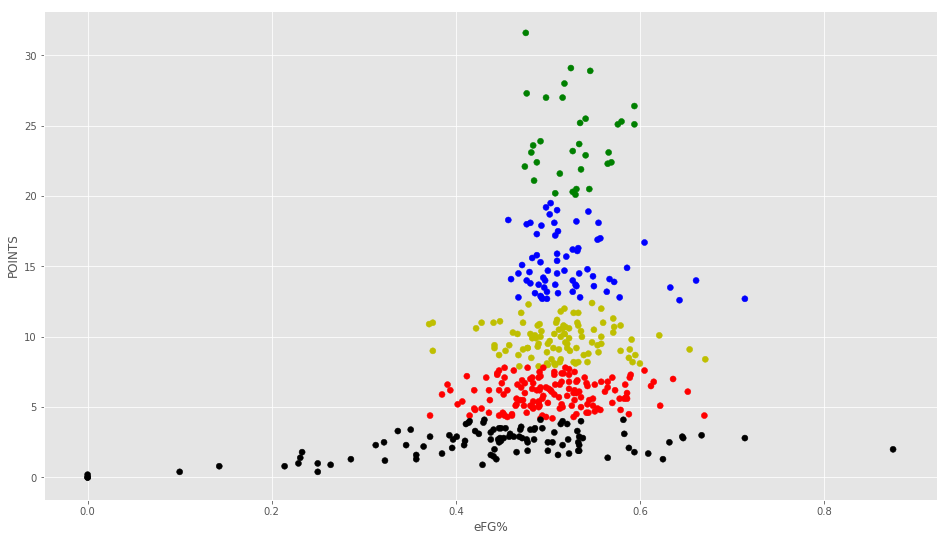

In [37]:
# Fit a k-means estimator to data_cluster
estimator = KMeans(n_clusters=5)
X = data_cluster[["eFG%", "POINTS"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(data_cluster["eFG%"], data_cluster["POINTS"], c=colors)
plt.xlabel("eFG%")
plt.ylabel("POINTS")
plt.show()

Counter({1: 174, 0: 124, 3: 91, 4: 31, 2: 26})


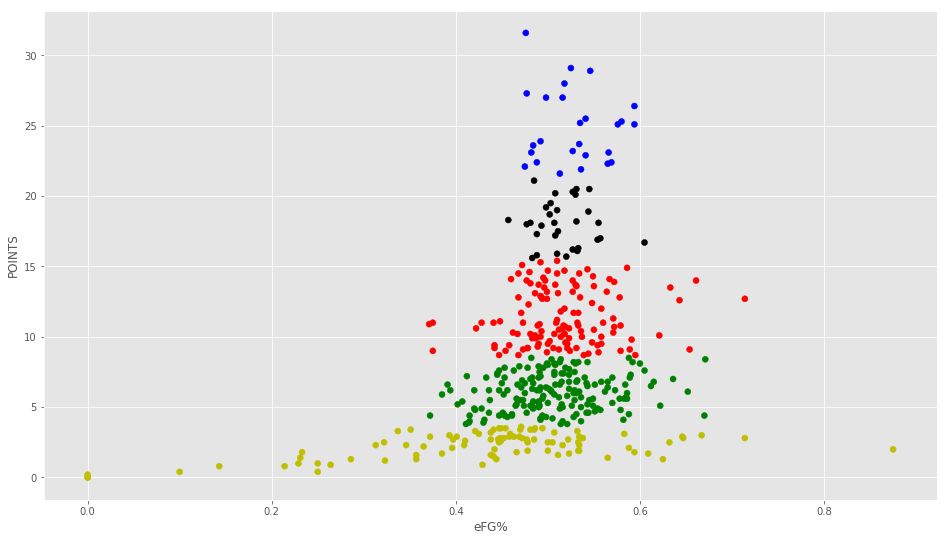

In [43]:
# Hierarchical: Agglomerative Clustering of data_cluster
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=5)
X = data_cluster[["eFG%", "POINTS"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(data_cluster["eFG%"], data_cluster["POINTS"], c=colors)
plt.xlabel("eFG%")
plt.ylabel("POINTS")
plt.show()

Counter({6: 333, -1: 49, 3: 26, 4: 15, 2: 7, 5: 6, 0: 5, 1: 5})


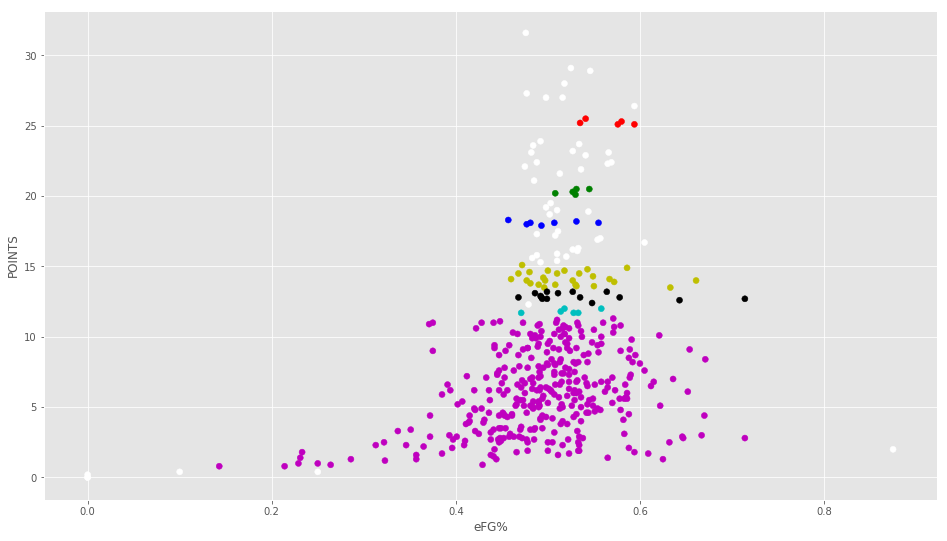

In [54]:
# Fit a DBSCAN estimator to data_cluster
estimator = DBSCAN(eps=0.3, min_samples=5)
X = data_cluster[["eFG%", "POINTS"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
# print labels
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(data_cluster["eFG%"], data_cluster["POINTS"], c=colors)
plt.xlabel("eFG%")
plt.ylabel("POINTS")
plt.show()

* Do the clustering methods generate the same clusters?
Different methods generate different clusters.
Of course the same method, such as k-means, may generate different clusters every time.
The clusters which are boundary points may belong to different range every time.

* Does scaling effect the clustering? 
It depends on the data type.

If the dataset is well-defined meaning, scaling will not effect the clustering. Say, all units in dataset is uniform.

If the data is mixed numerical data, where each attribute is something entirely different, has different units attached. then these values aren't really comparable anyway. Scaling can unify them and effect clustering.

Scikit Learn function: sklearn.preprocessing.MinMaxScaler.

* Does the clustering produce interesting groupings?
As for my first dataset, it cannot fit to DBSCAN clustering. Say, it will not be divided into different ranges.

As for my dataset data_cluster. It can fit to DBSCAN clustering. But there are many white points in different places. It seems that they don't belong to one group. They are some points which don't belongs to any group.